# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

In [11]:
#features_ = features_[:,:9]

# 三、PCA降维

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA()

In [14]:
features_reduced = pca.fit_transform(features_)

In [15]:
features.shape

(645, 13)

In [16]:
pca_2 = PCA(n_components=2)

In [17]:
features_2 = pca_2.fit_transform(features_)

In [18]:
features_2.shape

(645, 2)

In [19]:
pca_95 = PCA(n_components=0.95)

In [20]:
features_95 = pca_95.fit_transform(features_)

In [21]:
features_95.shape

(645, 8)

In [22]:
pca.explained_variance_ratio_

array([5.98380990e-01, 1.00856289e-01, 7.24708227e-02, 5.82440922e-02,
       4.42300518e-02, 3.30810740e-02, 2.82306212e-02, 2.38047542e-02,
       2.19693565e-02, 1.09810281e-02, 4.13031036e-03, 3.62060956e-03,
       7.26636775e-33])

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [24]:
cumsum

array([0.59838099, 0.69923728, 0.7717081 , 0.82995219, 0.87418225,
       0.90726332, 0.93549394, 0.9592987 , 0.98126805, 0.99224908,
       0.99637939, 1.        , 1.        ])

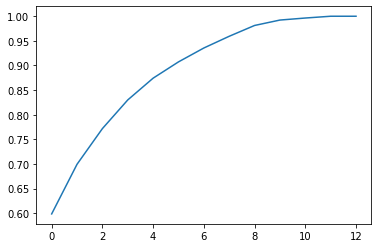

In [25]:
import matplotlib.pyplot as plt
plt.plot(cumsum)

In [26]:
pca_2.explained_variance_ratio_

array([0.59838099, 0.10085629])

In [27]:
features_2

array([[-1.0864809 ,  0.03310904],
       [-2.3234489 ,  0.41150904],
       [ 4.17232247,  1.34620136],
       ...,
       [-1.97317183,  0.10997357],
       [-2.44231697,  0.31116853],
       [-2.22965415,  0.40716041]])

In [28]:
x=features_2[:,0]
y=features_2[:,1]

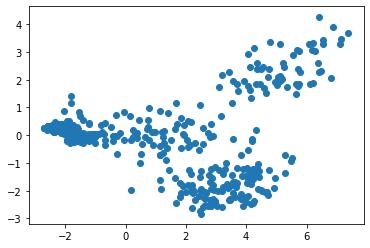

In [29]:
plt.scatter(x,y)

In [30]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(
    features_95, target, 
    test_size = 145, random_state = 99)

In [31]:
from sklearn.svm import SVC
clf = SVC()

In [32]:
clf.fit(train_features, train_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
clf.score(test_features, test_target)

0.9862068965517241

In [34]:
features_recovered = pca_95.inverse_transform(features_95)

In [35]:
features_recovered.shape #只保留features 95% 的信息

(645, 13)

# 四、Kernel PCA

In [36]:
from sklearn.decomposition import KernelPCA

In [37]:
linear_PCA = KernelPCA(n_components=2,kernel="linear")

In [38]:
features_linear = linear_PCA.fit_transform(features_)

In [39]:
rbf_PCA = KernelPCA(n_components=2,kernel="rbf")

In [40]:
features_rbf = rbf_PCA.fit_transform(features_)

In [41]:
sgm_PCA = KernelPCA(n_components=2,kernel="sigmoid")

In [42]:
features_sgm = sgm_PCA.fit_transform(features_)

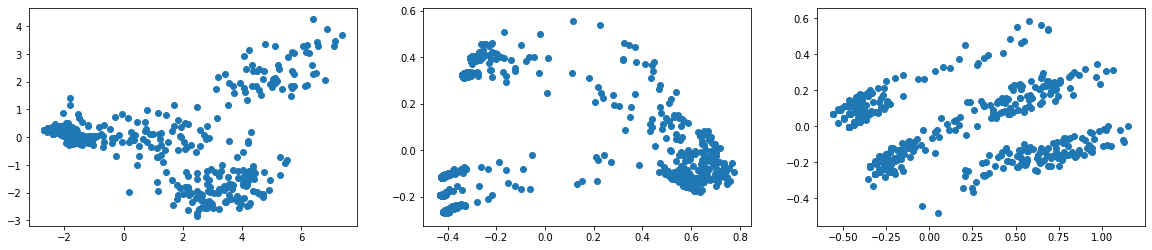

In [43]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.scatter(features_linear[:,0],features_linear[:,1])
plt.subplot(132)
plt.scatter(features_rbf[:,0],features_rbf[:,1])
plt.subplot(133)
plt.scatter(features_sgm[:,0],features_sgm[:,1])
plt.show()

# 五、LDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [46]:
features_lda = lda.fit_transform(features_,target)

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [47]:
features_lda.shape

(645, 1)